In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import copy
warnings.simplefilter("ignore")
plt.rcParams['font.sans-serif'] = ['SimHei']   
plt.rcParams['axes.unicode_minus'] = False 

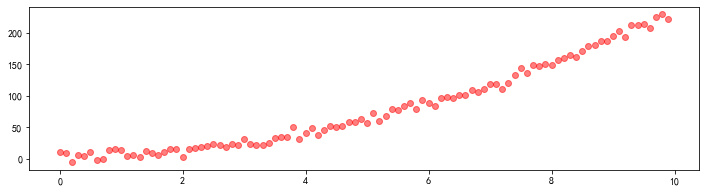

In [49]:
np.random.seed(242231)
x = np.arange(0, 10, 0.1)
y = 3.75 + 2.33 * np.power(x, 2) + np.random.randn(len(x))*5
plt.figure(figsize=(12, 3))
plt.plot(x, y, 'ro', alpha=0.5)
plt.show()

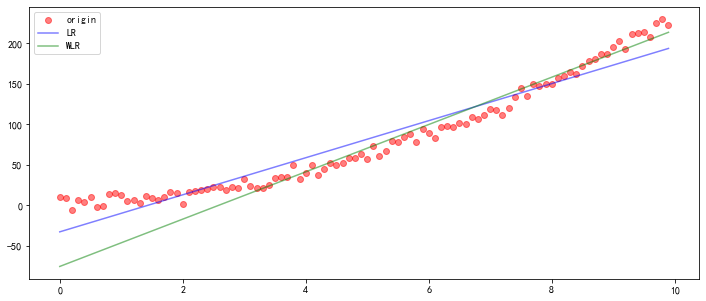

'\n通过比较普通线性回归（蓝色部分）和加权线性回归（绿色部分），可以看到WLR更加注重权重大的样本数据（X的末端）\n'

In [52]:
loops = 10000
learning_rate = 0.01


# 普通线性回归  ==========================================
np.random.seed(13013)
w = np.random.randn()
b = np.random.randn()
for i in range(loops):
    y_ = b + w*x
    mse = 0.5 * np.mean(np.power((y-y_), 2))
    dw = -np.mean((y-y_)*x)
    db = -np.mean((y-y_)*1)
    w -= dw*learning_rate # 不设置学习率，结果模型爆炸了
    b -= db*learning_rate

# 加权线性回归  ==========================================
np.random.seed(13013)
w = np.random.randn()
b = np.random.randn()
sw = np.power(x+1, 2)/np.sum(np.power(x+1, 2))
sw = sw/np.sum(sw) # x 越大的样本，权重越大
for i in range(loops):
    y2_ = b + w*x
    mse = 0.5 * np.mean(np.power((y-y2_), 2))
    dw = -np.dot((y-y2_)*x, sw) # 【从np.mean 修改成 np.dot，用加权梯度取代平均梯度】
    db = -np.dot((y-y2_)*1, sw)
    w -= dw*learning_rate # 不设置学习率，结果模型爆炸了
    b -= db*learning_rate

# ==========================================
plt.figure(figsize=(12, 5))
plt.plot(x, y, 'ro', alpha=0.5, label='origin')
plt.plot(x, y_, 'b-', alpha=0.5, label='LR')
plt.plot(x, y2_, 'g-', alpha=0.5, label='WLR')
plt.legend()
plt.show()

"""
通过比较普通线性回归（蓝色部分）和加权线性回归（绿色部分），可以看到WLR更加注重权重大的样本数据（X的末端）
"""